**Sentiment Analysis using BERT from Hugging Face**

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
!pip install transformers requests beautifulsoup4 pandas numpy
## transformers to allow us to install our pre trained nlp model from hugging face
## requests to scrape data from any popular e=commerce store, movie site etc
## beautifulsoup4 to analyze the data we scraped
## pandas and numpy to manipulate and convert data to make it suitable to be used by the mode;

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [5]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [34]:
tokens = tokenizer.encode('The food at the restraunt was disgusting!!!, yuck', return_tensors='pt')

In [35]:
tokens[0]

tensor([  101, 10103, 15225, 10160, 10103, 15941, 33240, 10368, 10140, 23145,
        77700, 10285,   106,   106,   106,   117, 16566, 11732,   102])

In [36]:
tokenizer.decode(tokens[0])

'[CLS] the food at the restraunt was disgusting!!!, yuck [SEP]'

In [38]:
tokens = tokenizer.encode('The food at the restraunt was disgusting!!!, yuck', return_tensors = 'pt')

In [39]:
result = model(tokens)

In [40]:
result.logits

tensor([[ 3.0654,  1.7424,  0.1116, -1.8706, -2.2896]],
       grad_fn=<AddmmBackward0>)

In [41]:
int(torch.argmax(result.logits))+1

1

In [86]:
r = requests.get('https://www.yelp.com/biz/sf-hole-in-the-wall-pizza-san-francisco-3')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [87]:
reviews

['Don\'t the best yummy foods discovery always emerge from little shops, like veritable \'holes in the wall\' type spots?  Well here\'s one serving up all the hits of a solid pizza menu in a casual breezy style without missing a beat on great execution of fresh ingredients and excellent taste.S. F. Hole in The Wall Pizza does not just cook up pizza.  You can also get salads, sandwiches, burgers, appetizers, desserts.  This is one of the niftiest neighbourhood places to get pizza by the slice.  Each is from a large pizza pie, and it is super yum.  Shared the "pepperoni mushrooms" and the "aloha" (ham and pineapple) slices with my mother, and they were both tasty.Hole in the Wall looks deceptively tiny but there definitely is space to hang here.  You can eat in the dining room or near the counter or just do take away in their adorable pizza box.  Cashiers and order takers are nice.  I\'d go back to try other stuff on the menu.  High quality eats in this little shop absolutely worth check

In [88]:
import numpy as np
import pandas as pd

In [89]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [90]:
df['review'].iloc[0]

'Don\'t the best yummy foods discovery always emerge from little shops, like veritable \'holes in the wall\' type spots?  Well here\'s one serving up all the hits of a solid pizza menu in a casual breezy style without missing a beat on great execution of fresh ingredients and excellent taste.S. F. Hole in The Wall Pizza does not just cook up pizza.  You can also get salads, sandwiches, burgers, appetizers, desserts.  This is one of the niftiest neighbourhood places to get pizza by the slice.  Each is from a large pizza pie, and it is super yum.  Shared the "pepperoni mushrooms" and the "aloha" (ham and pineapple) slices with my mother, and they were both tasty.Hole in the Wall looks deceptively tiny but there definitely is space to hang here.  You can eat in the dining room or near the counter or just do take away in their adorable pizza box.  Cashiers and order takers are nice.  I\'d go back to try other stuff on the menu.  High quality eats in this little shop absolutely worth checki

In [91]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [92]:
sentiment_score(df['review'].iloc[1])

3

In [93]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [94]:
df

,review,sentiment
0,Don't the best yummy foods discovery always em...,5
1,"Solid spot, we came here for fast, kid-friendl...",3
2,I've been coming here ever since they were Irv...,4
3,"When my brother has a request, I listen. And ...",2
4,"Dear Hi Mike C,Thank you so much for taking th...",5
5,"For about as long as I can remember, the space...",4
6,"Hi Mike L.,Thanks for the awesome review! We'r...",5
7,I came here after a suggestion from a coworker...,2
8,"Dear Jason S,Thank you for taking the time to ...",2
9,We ordered Hole In the Wall on DoorDash but af...,4


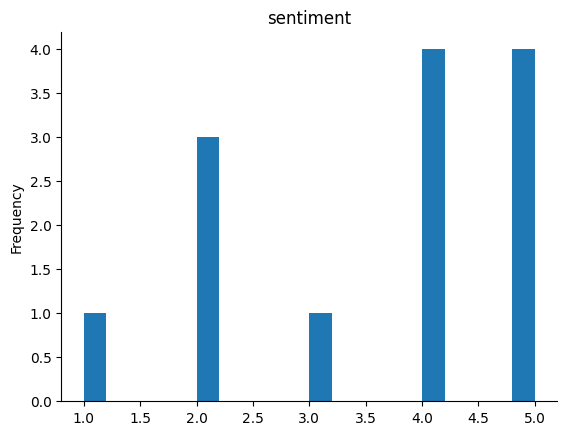

In [95]:
from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [96]:
df['review'].iloc[3]

'When my brother has a request, I listen.  And generally am open to it so long as I didn\'t have a negative experience or heard about one from someone I know about a business.He mentioned this pizzeria which wasn\'t on my radar.  He mentioned New York style pizza which piqued my interest.  After all, I\'ve been Yelping for a little while and rarely see it specified like that.  With a busy Saturday schedule, I noticed the restaurant recommends ordering online for takeout orders so I placed mine early that morning for a 5:30 pm pick up.  Later that morning, I got a text message that my pizza was ready, causing me to call the restaurant to confirm that I was coming at 5:30 pm.  The kind young lady apologized and confirmed that the text was in error.Running errands in another part of the Sunset District, I got here about five minutes early, finding a parking space around the block on 20th Avenue.  Walking by, I noticed the business occupies two spaces in addition to having an outdoor dinin